In [3]:
import pandas as pd
%matplotlib inline
# charger les données
data = pd.read_csv('decathlon.txt', sep="\t")

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values

In [4]:
data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [9]:
my_data = data.drop(['Rank','Points',"Competition"], axis=1)
X = my_data.values
print(X.shape)

(41, 10)


In [10]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)

pca.fit(X_scaled)

PCA(n_components=2)

In [11]:
print(pca.explained_variance_ratio_)

[0.32719055 0.1737131 ]


In [15]:
print(pca.explained_variance_ratio_.sum())

0.5009036561090068


In [17]:
X_scaled.shape

(41, 10)

In [16]:
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

(41, 2)


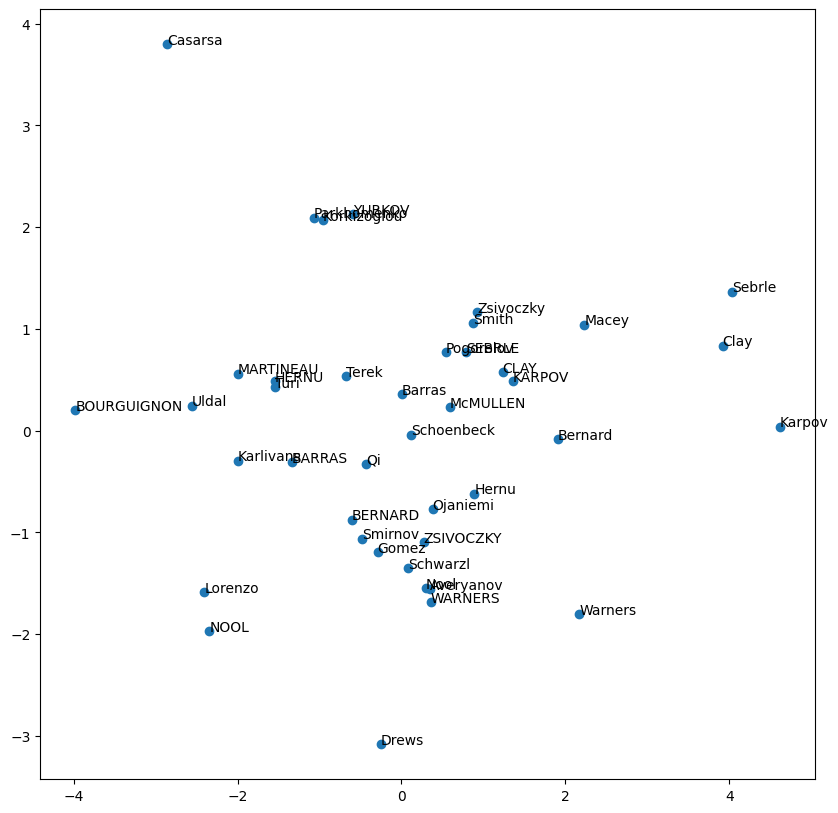

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(X_projected[:,0],X_projected[:,1])

for i, (x,y) in enumerate(zip(X_projected[:,0], X_projected[:,1])):
    plt.text(x,y,data.index[i])

plt.show()

In [31]:
pcs = pca.components_


array([[-0.42829627,  0.41015201,  0.34414444,  0.31619436, -0.3757157 ,
        -0.41255442,  0.30542571,  0.02783081,  0.15319802, -0.03210733],
       [ 0.14198909, -0.26207936,  0.45394697,  0.2657761 ,  0.432046  ,
         0.17359096,  0.4600244 , -0.13684105,  0.24050715,  0.35980486]])

Text(0, 0.5, 'PC2')

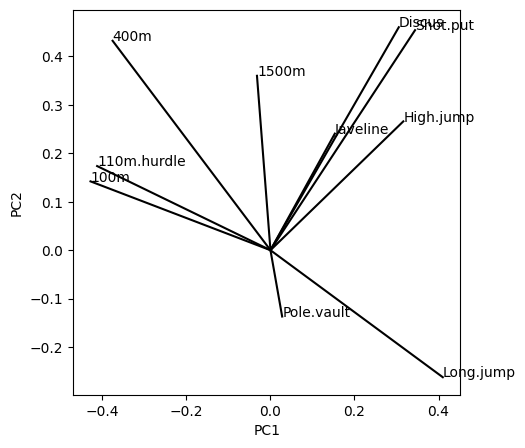

In [32]:
fig = plt.figure(figsize=(5,5))
for i, (x,y) in enumerate(zip(pcs[0,:], pcs[1,:])):
    plt.plot([0,x], [0,y], color='k')
    plt.text(x,y, data.columns[i])
    
plt.xlabel("PC1")
plt.ylabel("PC2")

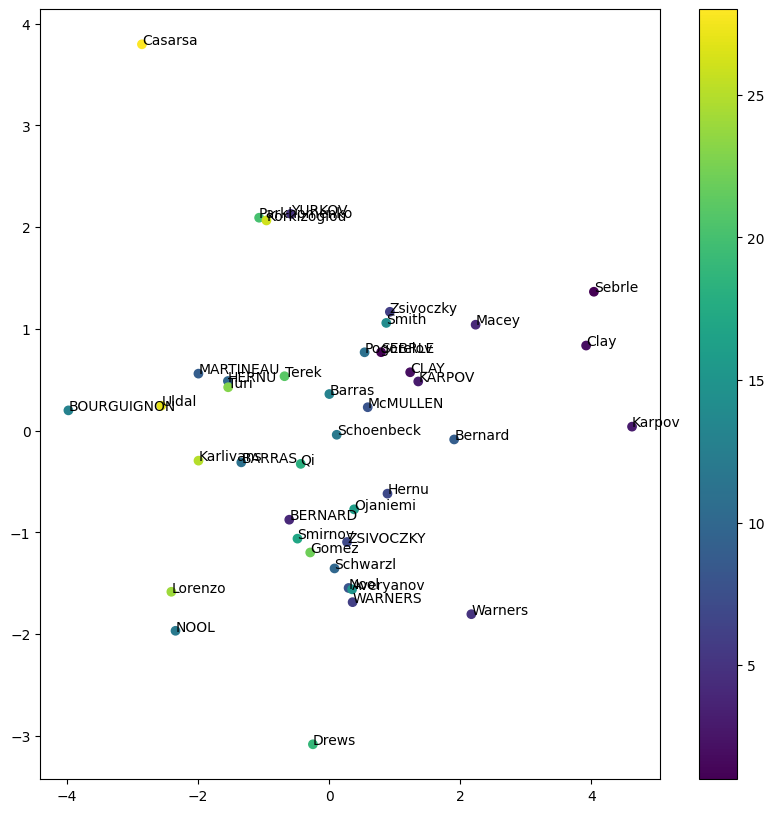

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(X_projected[:,0],X_projected[:,1], c=data.get('Rank'))
plt.colorbar()

for i, (x,y) in enumerate(zip(X_projected[:,0], X_projected[:,1])):
    plt.text(x,y,data.index[i])

plt.show()